In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('dementia_dataset.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df.shape

(373, 15)

In [4]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
df['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [6]:
df.Group.value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

In [7]:
df.shape

(373, 15)

In [8]:
# converting "Converted" to 'Nondemented' and 'Demented' 
df.loc[df.Group == 'Converted', 'Group'] = df.loc[df.Group == 'Converted'].apply(lambda x: 'Nondemented' if x[11] < 0.5 else 'Demented', axis=1)

In [9]:
df = df.replace('Nondemented', 0).replace('Demented', 1)
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [10]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [11]:
#Dropping unnecessary columns
df.drop(['Subject ID','MRI ID', 'Visit', 'MR Delay', 'eTIV','nWBV', 'ASF', 'CDR', 'Hand'], axis=1, inplace=True)

In [12]:
#Handling missing values in SES
df.SES.fillna(df.SES.median(), inplace=True)

In [13]:
#Dropping rows with missing MMSE
df.dropna(inplace=True, axis=0)

In [14]:
df.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
dtype: int64

In [15]:
df.shape

(371, 6)

In [16]:
df = df.replace('M', 0).replace('F', 1)
df.head()

,Group,M/F,Age,EDUC,SES,MMSE
0,0,0,87,14,2.0,27.0
1,0,0,88,14,2.0,30.0
2,1,0,75,12,2.0,23.0
3,1,0,76,12,2.0,28.0
4,1,0,80,12,2.0,22.0


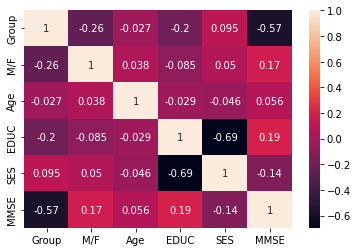

In [17]:
sns.heatmap(df.corr(), annot=True)

In [18]:
df.describe()

,Group,M/F,Age,EDUC,SES,MMSE
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.439353,0.568733,77.018868,14.611860,2.439353,27.342318
std,0.496979,0.495922,7.660864,2.877737,1.111835,3.683244
min,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000
25%,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000
50%,0.000000,1.000000,77.000000,15.000000,2.000000,29.000000
75%,1.000000,1.000000,82.000000,16.000000,3.000000,30.000000
max,1.000000,1.000000,98.000000,23.000000,5.000000,30.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 372
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   371 non-null    int64  
 1   M/F     371 non-null    int64  
 2   Age     371 non-null    int64  
 3   EDUC    371 non-null    int64  
 4   SES     371 non-null    float64
 5   MMSE    371 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 20.3 KB


In [20]:
from pycaret.classification import *

exp1 = setup(data = df, target = 'Group', ignore_features=None, silent = True)

,Description,Value
0,session_id,7448
1,Target,Group
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(371, 6)"
5,Missing Values,0
6,Numeric Features,3
7,Categorical Features,2
8,Ordinal Features,0
9,High Cardinality Features,0


In [21]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8225,0.8414,0.7800,0.7961,0.7789,0.6325,0.6389,0.1950
lr,Logistic Regression,0.8071,0.8813,0.6873,0.8349,0.7471,0.5941,0.6072,0.9140
rf,Random Forest Classifier,0.7992,0.8714,0.7518,0.7722,0.7523,0.5853,0.5922,0.2280
gbc,Gradient Boosting Classifier,0.7915,0.8475,0.6973,0.7921,0.7335,0.5648,0.5754,0.0670
ridge,Ridge Classifier,0.7838,0.0000,0.5864,0.8548,0.6874,0.5341,0.5608,0.0130
lda,Linear Discriminant Analysis,0.7802,0.8572,0.6055,0.8248,0.6918,0.5300,0.5487,0.0160
ada,Ada Boost Classifier,0.7760,0.8251,0.6691,0.7686,0.7111,0.5306,0.5376,0.0850
knn,K Neighbors Classifier,0.7646,0.8068,0.6327,0.7857,0.6906,0.5049,0.5216,0.0320
lightgbm,Light Gradient Boosting Machine,0.7569,0.8469,0.6691,0.7501,0.6935,0.4952,0.5090,0.0370
nb,Naive Bayes,0.7452,0.8272,0.4945,0.8538,0.6097,0.4446,0.4896,0.0180


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7448, verbose=0,
                     warm_start=False)

In [22]:
et = create_model('et')
tuned_model = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8462,0.9242,0.9091,0.7692,0.8333,0.6923,0.7006
1,0.8462,0.8788,0.8182,0.8182,0.8182,0.6848,0.6848
2,0.8462,0.8697,0.7273,0.8889,0.8000,0.6770,0.6860
3,0.6923,0.7515,0.3636,0.8000,0.5000,0.3203,0.3723
4,0.9231,0.9152,0.8182,1.0000,0.9000,0.8385,0.8497
5,0.7692,0.8970,0.6364,0.7778,0.7000,0.5155,0.5224
6,0.7692,0.7515,0.6364,0.7778,0.7000,0.5155,0.5224
7,0.7692,0.9152,0.7273,0.7273,0.7273,0.5273,0.5273
8,0.8462,0.9273,0.6364,1.0000,0.7778,0.6688,0.7088
9,0.8400,0.8667,0.6000,1.0000,0.7500,0.6429,0.6882


In [23]:
tuned_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=3, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=180, n_jobs=-1, oob_score=False,
                     random_state=7448, verbose=0, warm_start=False)

In [24]:
x = df.drop('Group', axis=1)
y = df['Group']

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
model_params = {
    'svm':{
        'model': SVC(),
        'params':{
            'C' : [1,2,3],
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
        }
    },
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
            
        }
    },
    'RF':{
        'model':RandomForestClassifier(n_jobs = -1),
        'params':{
            'n_estimators':[100,200,300,400,500],
            'criterion' : ["gini", "entropy"]
            
        }
    }
}

from sklearn.model_selection import GridSearchCV
scores = [] #List to append all the best scores
for model_name, modelp in model_params.items():
    clf = GridSearchCV(modelp['model'],modelp['params'],cv = 5,return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
scoreddf = pd.DataFrame(scores,columns=['model','best_score','best_params'])
scoreddf

In [25]:
x = df.drop('Group', axis=1)
y = df['Group']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = y)

In [27]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
X_train_std=std_scaler.fit_transform(X_train)
X_test_std=std_scaler.transform (X_test)

In [28]:
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier(random_state=42)
                
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        45
           1       0.79      0.87      0.83        30

    accuracy                           0.85        75
   macro avg       0.85      0.86      0.85        75
weighted avg       0.86      0.85      0.85        75



In [29]:
# Convert into ONNX format
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType, Int32TensorType

initial_type = [('X', FloatTensorType([None, X_train.shape[1]]))]
final_types = [('output_label', FloatTensorType([None, 1])), ('confidence', FloatTensorType([None, 1]))]
options = {id(model): {'zipmap': False}}

onnx_model_1 = convert_sklearn(model, initial_types=initial_type, options=options, final_types=final_types, target_opset=11)

with open("default_model_1.onnx", "wb") as f:
    f.write(onnx_model_1.SerializeToString())

In [30]:
# Now let's add the timestamp columns required to import data into the feature store, this is important in order to provide point-in-time correction

df["event_timestamp"] = pd.to_datetime('today') + pd.Timedelta(days=-1)
df["created_timestamp"] = pd.to_datetime('now')
df['index'] = range(1, len(df)+1)

In [31]:
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,event_timestamp,created_timestamp,index
0,0,0,87,14,2.0,27.0,2022-03-12 01:45:33.322597,2022-03-12 20:15:33.325393,1
1,0,0,88,14,2.0,30.0,2022-03-12 01:45:33.322597,2022-03-12 20:15:33.325393,2
2,1,0,75,12,2.0,23.0,2022-03-12 01:45:33.322597,2022-03-12 20:15:33.325393,3
3,1,0,76,12,2.0,28.0,2022-03-12 01:45:33.322597,2022-03-12 20:15:33.325393,4
4,1,0,80,12,2.0,22.0,2022-03-12 01:45:33.322597,2022-03-12 20:15:33.325393,5


In [32]:
df.rename(columns={'M/F':'gender', 'Age':'age', 'Group':'group', 'EDUC':'educ', 'SES':'ses', 'MMSE':'mmse'}, inplace=True)

In [33]:
df = df[['index', 'gender', 'age', 'educ', 'ses', 'mmse', 'group', 'event_timestamp','created_timestamp']]

In [34]:
df.to_csv('features.csv')

In [35]:
df.head()

,index,gender,age,educ,ses,mmse,group,event_timestamp,created_timestamp
0,1,0,87,14,2.0,27.0,0,2022-03-12 01:45:33.322597,2022-03-12 20:15:33.325393
1,2,0,88,14,2.0,30.0,0,2022-03-12 01:45:33.322597,2022-03-12 20:15:33.325393
2,3,0,75,12,2.0,23.0,1,2022-03-12 01:45:33.322597,2022-03-12 20:15:33.325393
3,4,0,76,12,2.0,28.0,1,2022-03-12 01:45:33.322597,2022-03-12 20:15:33.325393
4,5,0,80,12,2.0,22.0,1,2022-03-12 01:45:33.322597,2022-03-12 20:15:33.325393


In [36]:
model.predict([[0,87,14,2.0, 27.0]])

array([0])

In [37]:
model.score(X_train, y_train)

0.9966216216216216

In [39]:
df.age.describe()

count    371.000000
mean      77.018868
std        7.660864
min       60.000000
25%       71.000000
50%       77.000000
75%       82.000000
max       98.000000
Name: age, dtype: float64